# Tree appoach

## Import library
 

- *pandas* for managing data frame efficiently
- *matplotlib* for visualizing data
- *seaborn* provides various fascinating themes for visualization
- *numpy* for working with array
- *sklearn* provides some evaluate metrics, fast-used machine learning algorithms, choosing good hyperparameters
- *h2o* provides "Extended Isolation Forest" algorithm
-> For more details, go to "https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/eif.html"
-> For better understanding algorithm, go to "https://arxiv.org/abs/1811.02141"

In [1]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit

In [6]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()

## Importing data

In [12]:
df = pd.read_csv('../dataset/life_expectancy_prep.csv')

X_train = pd.read_csv('../dataset/X_train.csv').drop(columns=['country'])
y_train = pd.read_csv('../dataset/y_train.csv')

X_test = pd.read_csv('../dataset/X_test.csv').drop(columns=['country'])
y_test = pd.read_csv('../dataset/y_test.csv')

## Exploratory analysis


### Removing linear correlated features


In [ ]:
#Observing the statistical information of numerical columns in the data 
X_train.describe()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,thinness_5_9_years,income_composition_of_resources,schooling,status_Developed,status_Developing,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,...,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,2007.550024,163.784773,30.890190,4.629194,729.941698,80.825034,2488.181064,38.305969,43.047828,82.501734,...,4.852054,0.627866,12.017971,0.177648,0.822352,0.290874,0.183992,0.252318,0.213763,0.059053
std,4.632549,122.143019,117.699358,3.926122,1951.746016,22.751766,11891.273028,19.935305,161.664646,23.207281,...,4.521714,0.203551,3.260015,0.382309,0.382309,0.454276,0.387572,0.434449,0.410061,0.235782
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,74.000000,0.000000,1.110000,5.889526,80.940461,0.000000,19.300000,0.000000,78.000000,...,1.500000,0.497000,10.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,144.000000,3.000000,4.200000,67.639253,87.000000,15.000000,43.000000,4.000000,93.000000,...,3.300000,0.663000,12.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,225.000000,21.000000,7.400000,434.798502,96.000000,343.000000,56.100000,27.000000,97.000000,...,7.100000,0.773000,14.100000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2015.000000,693.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,...,28.600000,0.948000,20.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


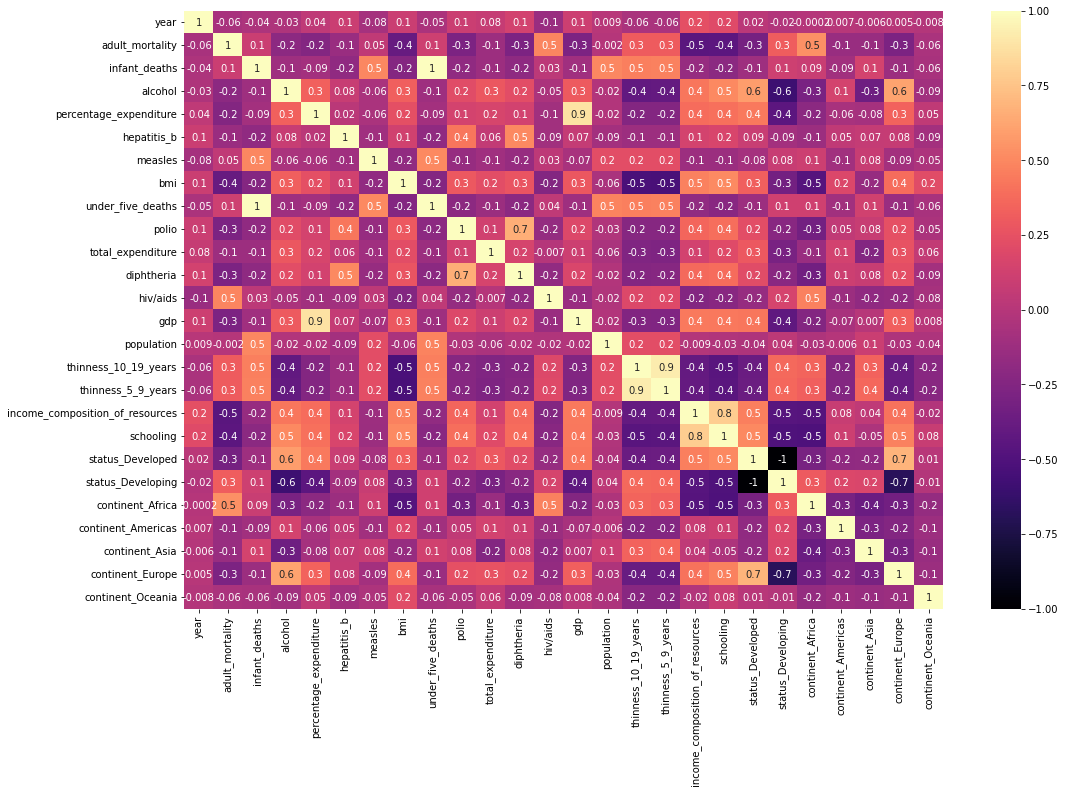

In [ ]:
#Observing the correlation between each feature in the data
plt.figure(figsize=(17,11))
sns.heatmap(X_train.corr(), annot=True, cmap="magma", fmt='.1g')

- "under_five_deaths" and "infant_deaths" have correlation of 1.0
- "thinness_5_9_years" and "thinness_10_19_years" have correlation of 0.9
- "schooling" and "income_composition_of_resources" have correlation of 0.8
- "gdp" and "percentage_expenditure" have correlation of 0.9

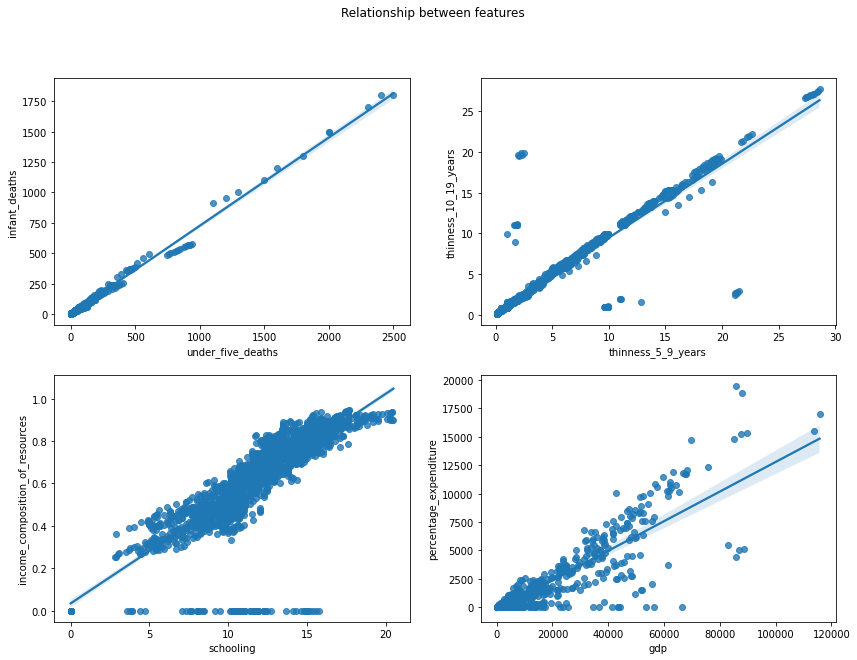

In [ ]:
#Plot graph to see relationship between these features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relationship between features')

sns.regplot(ax=axes[0,0], x=X_train['under_five_deaths'], y=X_train['infant_deaths'])

sns.regplot(ax=axes[0,1], x=X_train['thinness_5_9_years'], y=X_train['thinness_10_19_years'])

sns.regplot(ax=axes[1,0], x=X_train['schooling'], y=X_train['income_composition_of_resources'])

sns.regplot(ax=axes[1,1], x=X_train['gdp'], y=X_train['percentage_expenditure'])


- "infant_deaths" and "under_five_deaths" almost have linear relationship with each other, thus can remove 1 in 2, we choose "under_five_deaths".
- "thinness_5_9_years" and "thinness_10_19_years" almost have linear relationship with each other, thus can remove 1 in 2, we choose "thinness_10_19_years".
- "schooling" and "income_composition_of_resources" might be linearly correlated, but some data points don't follow that, so we haven't concluded yet.
- Linear line between "gdp" and "percentage_expenditure" seems fluctuate around an angle, we haven't concluded yet.  

In [ ]:
columns_drop = ["under_five_deaths", "thinness_10_19_years"]

### Relationship between explanatory vars and response var

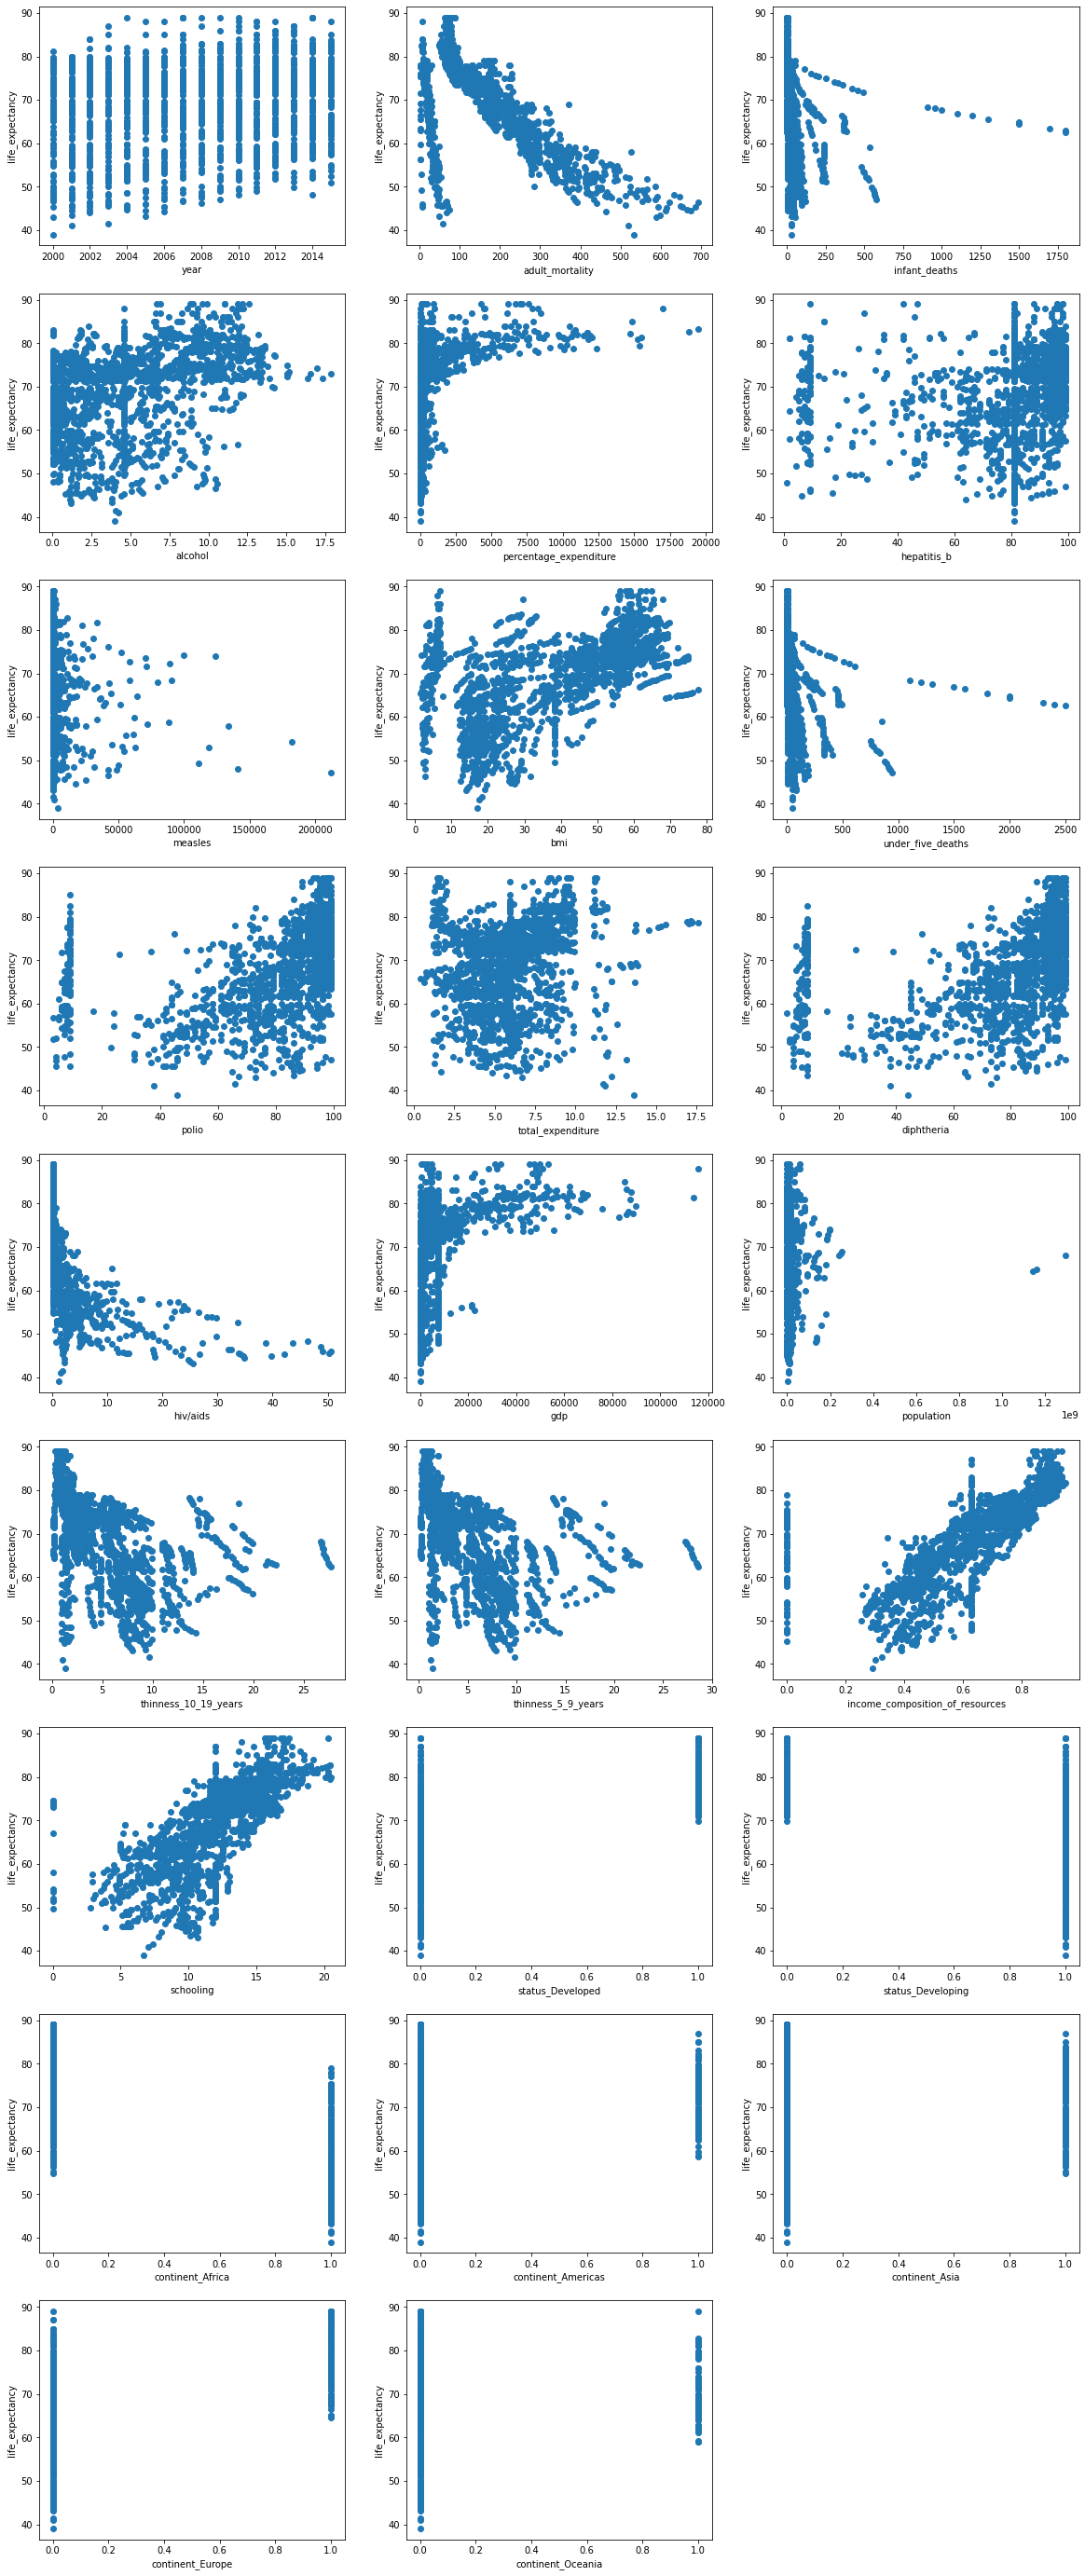

In [ ]:
fig.suptitle('Relationship between attributes and label')
plt.figure(figsize=(20,50))
for idx, col in enumerate(X_train.columns):
    plt.subplot(X_train.shape[1]//3+1, 3, idx+1)
    plt.plot(X_train[col], y_train, 'o')
    plt.xlabel(col)
    plt.ylabel(y_train.columns[0])

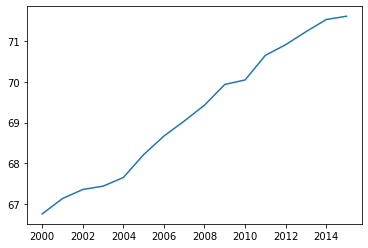

In [ ]:
plt.plot(df.groupby(['year']).life_expectancy.mean())

- "gdp" doesn't show linear relationship with "life_expectancy", hence can remove.
- "percentage_expenditure" doesn't show linear relationship with "life_expectancy", hence can remove.

In [ ]:
#dropping 'under_five_deaths', 'thinness_5_9_years' columns
columns_drop += ['percentage_expenditure', 'gdp']

### Some helpful functions

- Functions to support feature selection
1.  feature_importance: visualize data frame for importances of every feature considered.
2.  pprint: calculate three model scores including r2 score (r2), root mean square error (rmse), mean absolute error (mae), show feature importances.
3.  compare_loss: Compare model scores, feature importances before and after dropping features.

In [ ]:
#testing the loss in accuracy before and after removing features 

#making dataframe for feature importances
def feature_importance(model, x_train):
  importance = model.feature_importances_ 
  feature_importance = pd.DataFrame(importance, index=x_train.columns, columns=['Importances'])
  return feature_importance.sort_values(by=['Importances'], ascending=False)

def score(y_test, y_pred, score_show=False, feature_importance_df=None, importance_show=False, return_score=False):
  r2 = r2_score(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  if score_show:
    print(f'r2 score: {r2}')
    print(f'rmse: {rmse}')
    print(f'mae: {mae}')
    if importance_show:
      print('Importances of features:')
      print(feature_importance_df)
  if return_score:    
    return r2, rmse, mae

#comparing different scores
def compare_loss(X_train, y_train, X_test, y_test, columns=[], estimator='RF', random_state=15, show_org=False):
  assert len(columns) != 0, "Please input the columns you want to drop before compare"
  X_train_dropped = X_train.drop(columns=columns, axis=1)
  X_test_dropped = X_test.drop(columns=columns, axis=1)
  if estimator == 'RF':
    #original data
    training = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=random_state)

    #dropping column
    training_dropped = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=random_state)

  if estimator == 'DT':
    #original data
    training = DecisionTreeRegressor(random_state=random_state)
    
    #dropping column
    training_dropped = DecisionTreeRegressor(random_state=random_state)

  if estimator == 'AB':
    #original data
    training = AdaBoostRegressor(n_estimators= 50, random_state = random_state)
    
    #dropping column
    training_dropped = AdaBoostRegressor(n_estimators= 50, random_state = random_state)
  
  if estimator == 'GB':
    #original data
    training = GradientBoostingRegressor(n_estimators = 100,max_features = 'sqrt',learning_rate =0.2, subsample = 0.5, random_state=random_state)
    
    #dropping column
    training_dropped = GradientBoostingRegressor(n_estimators = 100,max_features = 'sqrt',learning_rate =0.2, subsample = 0.5, random_state=random_state)

  training.fit(X_train, y_train)
  feature_importance_df = feature_importance(training, X_train)
  pred = training.predict(X_test)
  
  #compute score for original data
  if show_org:
    print('Original:')
    score(y_test, pred, score_show=True, feature_importance_df=feature_importance_df, importance_show=True)
    
    print('<------------------------------------------------------------------------------------------------------------>')
  
  training_dropped.fit(X_train_dropped, y_train)
  feature_importance_df_dropped = feature_importance(training_dropped, X_train_dropped)
  pred = training_dropped.predict(X_test_dropped)
  
  #compute score for dropped data
  print('Dropped:')
  score(y_test, pred, score_show=True, feature_importance_df=feature_importance_df_dropped, importance_show=True)

- Functions to support detecting anomaly data points
1.  num_anomaly: count number of anomaly data points depending on threshold (> 0.5 and < 1).
2.  evaluate: check improvement in test data (split from original train data).

In [ ]:
#counting number of anomaly data points
def num_anomaly(anomaly_score, threshold):
  bool_val = anomaly_score > threshold
  print(f'Number of anomaly data points with threshold {threshold}: {bool_val.sum()}')

#evaluating score 
def evaluate(X_train, y_train, X_test, y_test, 
             estimator, anomaly_score, columns_drop=[], threshold=0.6, random_state=15, 
             n_estimators=100, max_features='sqrt', score_show=False):
  num_anomaly(anomaly_score=anomaly_score, threshold=threshold)

  if estimator == 'DT':
    Life_Tree = DecisionTreeRegressor(random_state=random_state)
  if estimator == 'RF':
    Life_Tree = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, random_state=random_state)
  if estimator == 'AB':
    Life_Tree = AdaBoostRegressor(n_estimators= n_estimators, random_state = random_state)
  if estimator == 'GB':
    Life_Tree = GradientBoostingRegressor(n_estimators = n_estimators,max_features = max_features,learning_rate =0.2, subsample = 0.5, random_state=random_state)

  Life_Tree.fit(X_train.loc[anomaly_score <= threshold], y_train.loc[anomaly_score <= threshold])
  pred = Life_Tree.predict(X_test.drop(columns=columns_drop))
  r2, rmse, mae = score(y_test, pred, score_show=score_show, return_score=True)

  return r2, rmse, mae


## Decision Tree

### Outlier detecting

In [ ]:
X_trainn = X_train.drop(columns=columns_drop)
# Define an Extended Isolation forest model
X_train_dt = X_trainn
X_train_dt['life_expectancy'] = y_train
eif_df = h2o.H2OFrame(X_train_dt)
X_train_dt.drop(columns=['life_expectancy'], inplace=True)

eif = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                          ntrees = 100,
                                          sample_size = 256,
                                          extension_level = eif_df.dim[1] - 1,
                                          seed = 15
                                          )

# Train Extended Isolation Forest
eif.train(x = eif_df.columns, 
          training_frame = eif_df)

# Calculate score
eif_result = eif.predict(eif_df)

# Number in [0, 1] explicitly defined in Equation (1) from Extended Isolation Forest paper
# or in paragraph '2 Isolation and Isolation Trees' of Isolation Forest paper
anomaly_score = eif_result["anomaly_score"].as_data_frame().values

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"].as_data_frame()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [ ]:
r2 = -1
for thres in [0.5, 0.6, 0.7, 0.8, 0.9, 0.98]:
  r2_pred, rmse_pred, mae_pred = evaluate(X_train_dt, y_train, X_test, y_test, estimator='DT', anomaly_score=anomaly_score, columns_drop=columns_drop, threshold=thres, score_show=True)
  print('<------------------------------------------------------------------------------------------------>')
  if r2_pred > r2:
    r2 = r2_pred
    threshold = thres 

Number of anomaly data points with threshold 0.5: 225
r2 score: 0.8930732466602445
rmse: 9.985938566552905
mae: 1.8325369738339023
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.6: 82
r2 score: 0.904122066762135
rmse: 8.954084186575656
mae: 1.7604095563139932
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.7: 39
r2 score: 0.9074949414146283
rmse: 8.639089874857794
mae: 1.7515358361774742
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.8: 13
r2 score: 0.9076783981188559
rmse: 8.621956769055746
mae: 1.7017064846416385
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.9: 0
r2 score: 0.917006184809506
rmse

In [ ]:
X_train_dt_cleaned = X_train_dt.loc[anomaly_score <= threshold]
y_train_dt_cleaned = y_train[anomaly_score <= threshold]

print(X_train_dt_cleaned.shape)
print(y_train_dt_cleaned.shape)

(2049, 22)
(2049, 1)


### Selecting features

In [ ]:
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop, estimator='DT', show_org=True)

Original:
r2 score: 0.9163962460856894
rmse: 7.807792946530149
mae: 1.6224118316268488
Importances of features:
                                 Importances
hiv/aids                            0.585211
income_composition_of_resources     0.165641
adult_mortality                     0.111773
continent_Africa                    0.057514
under_five_deaths                   0.009849
alcohol                             0.008874
thinness_5_9_years                  0.008235
year                                0.007344
bmi                                 0.007012
thinness_10_19_years                0.006324
total_expenditure                   0.004866
polio                               0.004395
population                          0.004110
percentage_expenditure              0.003827
infant_deaths                       0.003186
schooling                           0.003103
diphtheria                          0.002683
hepatitis_b                         0.002089
measles                          

- Dropping features that have importance percentage < 1%

In [ ]:
drop_dt = ['alcohol',  'polio', 'diphtheria', 'bmi', 'continent_Asia', 'continent_Europe', 'continent_Oceania','status_Developing',  'year', 'measles'] 
columns_drop_dt = columns_drop + drop_dt
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop_dt, estimator='DT')

Dropped:
r2 score: 0.9262840264478763
rmse: 6.884368600682595
mae: 1.5012514220705346
Importances of features:
                                 Importances
hiv/aids                            0.587181
income_composition_of_resources     0.175770
adult_mortality                     0.115905
continent_Africa                    0.057811
thinness_5_9_years                  0.020248
infant_deaths                       0.014674
total_expenditure                   0.008740
schooling                           0.007250
hepatitis_b                         0.006153
population                          0.004090
continent_Americas                  0.002081
status_Developed                    0.000097


[Text(0.5, 0, 'adult_mortality'),
 Text(1.5, 0, 'infant_deaths'),
 Text(2.5, 0, 'hepatitis_b'),
 Text(3.5, 0, 'total_expenditure'),
 Text(4.5, 0, 'hiv/aids'),
 Text(5.5, 0, 'population'),
 Text(6.5, 0, 'thinness_5_9_years'),
 Text(7.5, 0, 'income_composition_of_resources'),
 Text(8.5, 0, 'schooling'),
 Text(9.5, 0, 'status_Developed'),
 Text(10.5, 0, 'continent_Africa'),
 Text(11.5, 0, 'continent_Americas')]

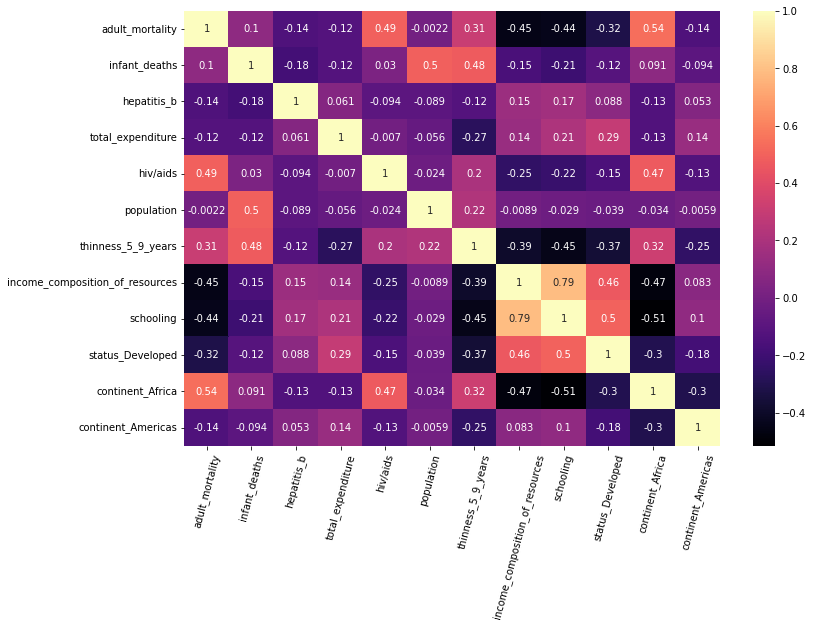

In [ ]:
plt.figure(figsize=(12,8))
g = sns.heatmap(X_train.drop(columns=columns_drop_dt).corr(), cmap='magma', annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=75)

### Hyperparameter tunning

In [ ]:
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
          'random_state':np.arange(15)}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, scoring='r2', cv=cv_sets, verbose= 3, n_jobs=-1)
grid_search.fit(X_train_dt_cleaned, y_train_dt_cleaned)
grid_search = grid_search.best_estimator_

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [ ]:
grid_search.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

### Final training model and testing

In [ ]:
Life_Tree = DecisionTreeRegressor(max_depth=10, random_state=0)
X_train_dt_cleanedd = X_train_dt_cleaned.drop(columns = drop_dt)
Life_Tree.fit(X_train_dt_cleanedd, y_train_dt_cleaned)

print("Train score:")
pred = Life_Tree.predict(X_train_dt_cleanedd)
score(y_test=y_train_dt_cleaned, y_pred=pred, score_show=True)
print('<-------------------------------------------------------------------------------------------------->')
print("Test score:")
pred = Life_Tree.predict(X_test.drop(columns=columns_drop_dt))
score(y_test=y_test, y_pred=pred, score_show=True)

Train score:
r2 score: 0.9824550638082995
rmse: 1.5698206660121887
mae: 0.7470530557464966
<-------------------------------------------------------------------------------------------------->
Test score:
r2 score: 0.9326483994187478
rmse: 6.289996888115851
mae: 1.5630503359532169


## Random Forest

## Outlier detecting

In [ ]:
X_trainn = X_train.drop(columns=columns_drop)
# Define an Extended Isolation forest model
X_train_rf = X_trainn
X_train_rf['life_expectancy'] = y_train
df_X = h2o.H2OFrame(X_train_rf)
X_train_rf.drop(columns=['life_expectancy'], inplace=True)
eif = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                          ntrees = 100,
                                          sample_size = 256,
                                          extension_level = df_X.dim[1] - 1,
                                          seed = 15
                                          )

# Train Extended Isolation Forest
eif.train(x = df_X.columns, 
          training_frame = df_X)

# Calculate score
eif_result = eif.predict(df_X)

# Number in [0, 1] explicitly defined in Equation (1) from Extended Isolation Forest paper
# or in paragraph '2 Isolation and Isolation Trees' of Isolation Forest paper
anomaly_score = eif_result["anomaly_score"].as_data_frame().values

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"].as_data_frame()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [ ]:
r2 = -1
for thres in [0.5, 0.6, 0.7, 0.8, 0.9, 0.98]:
  r2_pred, rmse_pred, mae_pred = evaluate(X_train_rf, y_train, X_test, y_test, estimator='RF', anomaly_score=anomaly_score, columns_drop=columns_drop, threshold=thres, score_show=True)
  print('<------------------------------------------------------------------------------------------------>')
  if r2_pred > r2:
    r2 = r2_pred
    threshold = thres 

Number of anomaly data points with threshold 0.5: 225


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


r2 score: 0.9554582717416951
rmse: 4.159772443686011
mae: 1.2714084186575656
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.6: 82


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


r2 score: 0.957169296627364
rmse: 3.9999790443686054
mae: 1.2447463026166106
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.7: 39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


r2 score: 0.957080399440993
rmse: 4.008281193401602
mae: 1.2457235494880567
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.8: 13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


r2 score: 0.9580846073067554
rmse: 3.914497759954504
mae: 1.2421058020477838
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.9: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


r2 score: 0.9574426502839104
rmse: 3.974450420932885
mae: 1.2462825938566573
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.98: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


r2 score: 0.9574426502839104
rmse: 3.974450420932885
mae: 1.2462825938566573
<------------------------------------------------------------------------------------------------>


In [ ]:
X_train_rf_cleaned = X_train_rf.loc[anomaly_score <= threshold]
y_train_rf_cleaned = y_train[anomaly_score <= threshold]

print(X_train_rf_cleaned.shape)
print(y_train_rf_cleaned.shape)

(2036, 22)
(2036, 1)


# https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604
# https://towardsdatascience.com/statistics-supporting-linear-models-bfc24fb9781f


## Select features

In [ ]:
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop, estimator='RF', show_org=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Original:
r2 score: 0.958948041838875
rmse: 3.8338612127417573
mae: 1.2139044368600698
Importances of features:
                                 Importances
hiv/aids                            0.199980
income_composition_of_resources     0.146581
adult_mortality                     0.124415
continent_Africa                    0.103951
schooling                           0.082809
under_five_deaths                   0.037628
polio                               0.037468
diphtheria                          0.034419
infant_deaths                       0.029313
bmi                                 0.028433
thinness_10_19_years                0.026293
thinness_5_9_years                  0.025542
status_Developed                    0.017614
status_Developing                   0.015603
gdp                                 0.013061
percentage_expenditure              0.012517
alcohol                             0.010314
year                                0.009876
total_expenditure                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Dropped:
r2 score: 0.9574426502839104
rmse: 3.974450420932885
mae: 1.2462825938566573
Importances of features:
                                 Importances
hiv/aids                            0.180508
income_composition_of_resources     0.150544
adult_mortality                     0.132409
schooling                           0.118297
continent_Africa                    0.114939
bmi                                 0.046953
infant_deaths                       0.045963
thinness_5_9_years                  0.037181
diphtheria                          0.033431
polio                               0.028448
alcohol                             0.016741
status_Developed                    0.013894
status_Developing                   0.013181
total_expenditure                   0.013001
year                                0.011237
measles                             0.010106
continent_Europe                    0.007574
hepatitis_b                         0.007510
population                        

- Dropping features that have importance percentage < 1%

In [ ]:
drop_rf = ['population','continent_Americas','hepatitis_b','continent_Europe','continent_Asia','continent_Oceania']
columns_drop_rf = columns_drop + drop_rf
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop_rf, estimator='RF')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:74: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Dropped:
r2 score: 0.9587820440976664
rmse: 3.849363817974971
mae: 1.1927872582480097
Importances of features:
                                 Importances
hiv/aids                            0.189009
income_composition_of_resources     0.181958
adult_mortality                     0.177934
continent_Africa                    0.127876
schooling                           0.079985
polio                               0.043518
diphtheria                          0.035544
infant_deaths                       0.034924
bmi                                 0.034636
thinness_5_9_years                  0.030170
status_Developed                    0.013285
alcohol                             0.012910
total_expenditure                   0.011346
year                                0.011100
measles                             0.008618
status_Developing                   0.007188


[Text(0.5, 0, 'year'),
 Text(1.5, 0, 'adult_mortality'),
 Text(2.5, 0, 'infant_deaths'),
 Text(3.5, 0, 'alcohol'),
 Text(4.5, 0, 'measles'),
 Text(5.5, 0, 'bmi'),
 Text(6.5, 0, 'polio'),
 Text(7.5, 0, 'total_expenditure'),
 Text(8.5, 0, 'diphtheria'),
 Text(9.5, 0, 'hiv/aids'),
 Text(10.5, 0, 'thinness_5_9_years'),
 Text(11.5, 0, 'income_composition_of_resources'),
 Text(12.5, 0, 'schooling'),
 Text(13.5, 0, 'status_Developed'),
 Text(14.5, 0, 'status_Developing'),
 Text(15.5, 0, 'continent_Africa')]

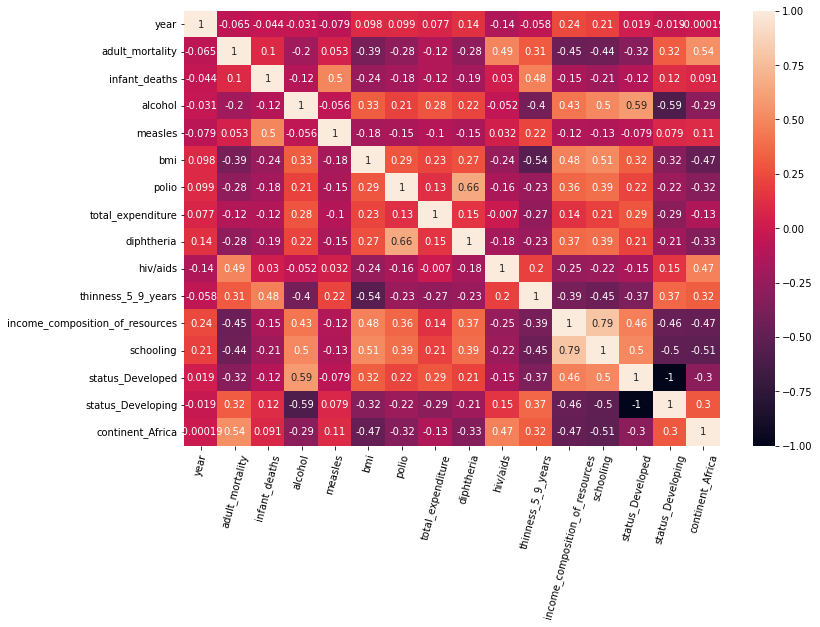

In [ ]:
plt.figure(figsize=(12,8))
g = sns.heatmap(X_train.drop(columns=columns_drop_rf).corr(), annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=75)

## Hyperparameter tunning

In [ ]:
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
params_rf = {'n_estimators':np.array(range(50,1000,100)), 'max_features': [0.5,'auto', 'sqrt','log2'], 'min_samples_leaf': [1,2,4]}
grid_search = GridSearchCV(estimator= RandomForestRegressor(random_state=7), param_grid=params_rf, scoring='r2', cv=cv_sets, verbose= 3, n_jobs=-1)
grid_search.fit(X_train_rf_cleaned, y_train_rf_cleaned)
grid_search = grid_search.best_estimator_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
grid_search.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 0.5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 750,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

## Final training model and testing

In [ ]:
Life_RF = RandomForestRegressor(n_estimators=750, random_state = 7, max_features=0.5, min_samples_leaf=1)
X_train_rf_cleanedd = X_train_rf_cleaned.drop(columns = drop_rf)
Life_RF.fit(X_train_rf_cleanedd, y_train_rf_cleaned)

print("Train score:")
pred = Life_RF.predict(X_train_rf_cleanedd)
score(y_test=y_train_rf_cleaned, y_pred=pred, score_show=True)
print('<-------------------------------------------------------------------------------------------------->')
print("Test score:")
X_testtt = X_test.drop(columns=columns_drop_rf)
pred = Life_RF.predict(X_testtt)
score(y_test=y_test, y_pred=pred, score_show=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train score:
r2 score: 0.995043266362183
rmse: 0.44548656541365445
mae: 0.41478624754420573
<-------------------------------------------------------------------------------------------------->
Test score:
r2 score: 0.9606867328754407
rmse: 3.67148405889521
mae: 1.1473084565794505


# Adaptive Boosting (AdaBoost)

## Outlier detecting

In [ ]:
X_trainn = X_train.drop(columns=columns_drop)
# Define an Extended Isolation forest model
X_train_ab = X_trainn
X_train_ab['life_expectancy'] = y_train
df_X = h2o.H2OFrame(X_train_ab)
X_train_ab.drop(columns=['life_expectancy'], inplace=True)
eif = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                          ntrees = 100,
                                          sample_size = 256,
                                          extension_level = df_X.dim[1] - 1,
                                          seed = 15
                                          )

# Train Extended Isolation Forest
eif.train(x = df_X.columns, 
          training_frame = df_X)

# Calculate score
eif_result = eif.predict(df_X)

# Number in [0, 1] explicitly defined in Equation (1) from Extended Isolation Forest paper
# or in paragraph '2 Isolation and Isolation Trees' of Isolation Forest paper
anomaly_score = eif_result["anomaly_score"].as_data_frame().values

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"].as_data_frame()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [ ]:
r2 = -1
for thres in [0.5, 0.6, 0.7, 0.8, 0.9, 0.98]:
  r2_pred, rmse_pred, mae_pred = evaluate(X_train_ab, y_train, X_test, y_test, estimator='AB', anomaly_score=anomaly_score, columns_drop=columns_drop, threshold=thres, score_show=True)
  print('<------------------------------------------------------------------------------------------------>')
  if r2_pred > r2:
    r2 = r2_pred
    threshold = thres 

Number of anomaly data points with threshold 0.5: 225


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.8932360661814475
rmse: 9.970732776744592
mae: 2.4796204567928135
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.6: 82


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.889542138901401
rmse: 10.315710340691107
mae: 2.539463743207547
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.7: 39


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.8885864002514535
rmse: 10.404967211829149
mae: 2.5381090677720333
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.8: 13


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.8851706803808403
rmse: 10.723962858130273
mae: 2.6041736313228245
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.9: 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.8861765364318559
rmse: 10.630025499905994
mae: 2.5795616421416483
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.98: 0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.8861765364318559
rmse: 10.630025499905994
mae: 2.5795616421416483
<------------------------------------------------------------------------------------------------>


In [ ]:
X_train_ab_cleaned = X_train_ab.loc[anomaly_score <= threshold]
y_train_ab_cleaned = y_train[anomaly_score <= threshold]

print(X_train_ab_cleaned.shape)
print(y_train_ab_cleaned.shape)

(1824, 22)
(1824, 1)


## Select features

In [ ]:
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop, estimator='AB', show_org=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Original:
r2 score: 0.8927728876415906
rmse: 10.013989233149475
mae: 2.4852127618819164
Importances of features:
                                 Importances
hiv/aids                            0.335768
continent_Africa                    0.157010
income_composition_of_resources     0.151038
adult_mortality                     0.076770
diphtheria                          0.071553
alcohol                             0.026984
thinness_5_9_years                  0.026974
under_five_deaths                   0.021813
thinness_10_19_years                0.017828
year                                0.014591
schooling                           0.014215
measles                             0.012890
polio                               0.012283
total_expenditure                   0.012257
bmi                                 0.011349
infant_deaths                       0.009505
gdp                                 0.009222
population                          0.006847
status_Developed                

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dropped:
r2 score: 0.8875197089006317
rmse: 10.504586006621631
mae: 2.5479313339477283
Importances of features:
                                 Importances
hiv/aids                            0.338418
income_composition_of_resources     0.174812
continent_Africa                    0.146509
adult_mortality                     0.071891
diphtheria                          0.056212
thinness_5_9_years                  0.039515
alcohol                             0.032111
infant_deaths                       0.031234
polio                               0.022018
year                                0.020331
total_expenditure                   0.016425
schooling                           0.016290
bmi                                 0.012087
measles                             0.010785
hepatitis_b                         0.004344
status_Developing                   0.002887
population                          0.002807
status_Developed                    0.001325
continent_Americas               

- Dropping features that have importance percentage < 1%

In [ ]:
drop_ab = ['status_Developed','population','continent_Americas','hepatitis_b','status_Developing','continent_Europe','continent_Asia','continent_Oceania']
columns_drop_ab = columns_drop + drop_ab
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop_ab, estimator='AB')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dropped:
r2 score: 0.8865895050885135
rmse: 10.59145816753603
mae: 2.557946781767115
Importances of features:
                                 Importances
hiv/aids                            0.331845
continent_Africa                    0.168167
income_composition_of_resources     0.142017
adult_mortality                     0.078512
polio                               0.061156
thinness_5_9_years                  0.037845
diphtheria                          0.035895
alcohol                             0.028928
infant_deaths                       0.026761
schooling                           0.020164
bmi                                 0.019471
year                                0.018805
total_expenditure                   0.016166
measles                             0.014268


[Text(0.5, 0, 'year'),
 Text(1.5, 0, 'adult_mortality'),
 Text(2.5, 0, 'infant_deaths'),
 Text(3.5, 0, 'alcohol'),
 Text(4.5, 0, 'measles'),
 Text(5.5, 0, 'bmi'),
 Text(6.5, 0, 'polio'),
 Text(7.5, 0, 'total_expenditure'),
 Text(8.5, 0, 'diphtheria'),
 Text(9.5, 0, 'hiv/aids'),
 Text(10.5, 0, 'thinness_5_9_years'),
 Text(11.5, 0, 'income_composition_of_resources'),
 Text(12.5, 0, 'schooling'),
 Text(13.5, 0, 'continent_Africa')]

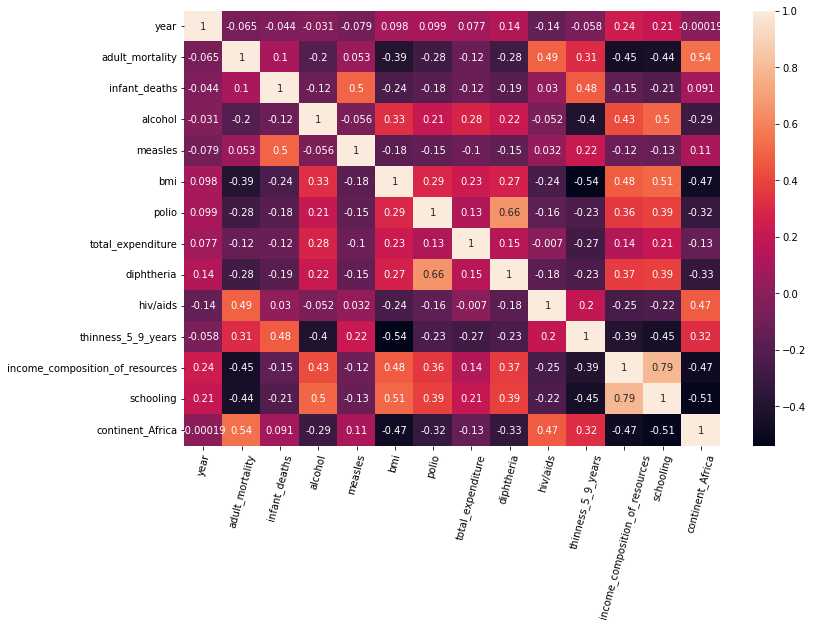

In [ ]:
plt.figure(figsize=(12,8))
g = sns.heatmap(X_train.drop(columns=columns_drop_ab).corr(), annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=75)

## Hyperarameter tunning

In [ ]:
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
params_ab = {'n_estimators':np.array(range(25,525,25)),"learning_rate": [0.01,0.025,0.05,0.075,0.1,0.25,0.5,0.75,1.0], 'loss': ['linear', 'square','exponential']}
grid_search = GridSearchCV(estimator= AdaBoostRegressor(random_state=15), param_grid=params_ab, scoring='r2', cv=cv_sets, verbose= 3, n_jobs=-1)
grid_search.fit(X_train_ab_cleaned, y_train_ab_cleaned)
grid_search = grid_search.best_estimator_

Fitting 10 folds for each of 540 candidates, totalling 5400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
grid_search.get_params()

{'base_estimator': None,
 'learning_rate': 0.05,
 'loss': 'square',
 'n_estimators': 275,
 'random_state': 15}

## Final training model and testing

In [ ]:
Life_Ada = AdaBoostRegressor(learning_rate=0.05, n_estimators=275, random_state = 15, loss= 'square')
X_train_ab_cleanedd= X_train_ab_cleaned.drop(columns = drop_ab)
Life_Ada.fit(X_train_ab_cleanedd, y_train_ab_cleaned)

print("Train score:")
pred = Life_Ada.predict(X_train_ab_cleanedd)
score(y_test=y_train_ab_cleaned, y_pred=pred, score_show=True)
print('<-------------------------------------------------------------------------------------------------->')
print("Test score:")
X_testt = X_test.drop(columns=columns_drop_ab)
pred = Life_Ada.predict(X_testt)
score(y_test=y_test, y_pred=pred, score_show=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score:
r2 score: 0.9042973305811652
rmse: 8.557836055321252
mae: 2.3465759116607328
<-------------------------------------------------------------------------------------------------->
Test score:
r2 score: 0.8928263768793054
rmse: 10.008993848691347
mae: 2.464638461544836


# Gradient Boosting

## Outlier detecting

In [ ]:
X_trainn = X_train.drop(columns=columns_drop)
# Define an Extended Isolation forest model
X_train_gb = X_trainn
X_train_gb['life_expectancy'] = y_train
df_X = h2o.H2OFrame(X_train_gb)
X_train_gb.drop(columns=['life_expectancy'], inplace=True)
eif = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                          ntrees = 100,
                                          sample_size = 256,
                                          extension_level = df_X.dim[1] - 1,
                                          seed = 15
                                          )

# Train Extended Isolation Forest
eif.train(x = df_X.columns, 
          training_frame = df_X)

# Calculate score
eif_result = eif.predict(df_X)

# Number in [0, 1] explicitly defined in Equation (1) from Extended Isolation Forest paper
# or in paragraph '2 Isolation and Isolation Trees' of Isolation Forest paper
anomaly_score = eif_result["anomaly_score"].as_data_frame().values

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"].as_data_frame()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [ ]:
r2 = -1
for thres in [0.5, 0.6, 0.7, 0.8, 0.9, 0.98]:
  r2_pred, rmse_pred, mae_pred = evaluate(X_train_gb, y_train, X_test, y_test, estimator='GB', anomaly_score=anomaly_score, columns_drop=columns_drop, threshold=thres, score_show=True)
  print('<------------------------------------------------------------------------------------------------>')
  if r2_pred > r2:
    r2 = r2_pred
    threshold = thres 

Number of anomaly data points with threshold 0.5: 225


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.9390972463437525
rmse: 5.6877361142047675
mae: 1.6466398661463109
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.6: 82


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.9375510410606853
rmse: 5.8321369351941295
mae: 1.6852343898846782
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.7: 39


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.9351336209330529
rmse: 6.057900910346187
mae: 1.7698595710081175
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.8: 13


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.9294788923196561
rmse: 6.58599861068957
mae: 1.8098130374147412
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.9: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 score: 0.9377215324228392
rmse: 5.816214668638576
mae: 1.6941015932881314
<------------------------------------------------------------------------------------------------>
Number of anomaly data points with threshold 0.98: 0
r2 score: 0.9377215324228392
rmse: 5.816214668638576
mae: 1.6941015932881314
<------------------------------------------------------------------------------------------------>


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train_gb_cleaned = X_train_gb.loc[anomaly_score <= threshold]
y_train_gb_cleaned = y_train[anomaly_score <= threshold]

print(X_train_gb_cleaned.shape)
print(y_train_gb_cleaned.shape)

(1824, 22)
(1824, 1)


## Select features

In [ ]:
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop, estimator='GB', show_org=True)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Original:
r2 score: 0.941958005784104
rmse: 5.420568477175094
mae: 1.6239547309128546
Importances of features:
                                 Importances
hiv/aids                            0.299671
income_composition_of_resources     0.220426
adult_mortality                     0.178974
under_five_deaths                   0.068400
diphtheria                          0.046502
schooling                           0.039575
thinness_10_19_years                0.024722
gdp                                 0.021699
alcohol                             0.016141
infant_deaths                       0.010044
continent_Africa                    0.009870
thinness_5_9_years                  0.009320
year                                0.008390
polio                               0.007895
bmi                                 0.007574
total_expenditure                   0.006996
continent_Americas                  0.006516
population                          0.005443
percentage_expenditure            

In [ ]:
drop_gb = ['year','measles','status_Developing','status_Developed','population','continent_Americas','hepatitis_b','continent_Europe','continent_Asia','continent_Oceania']
columns_drop_gb = columns_drop + drop_gb
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop_gb, estimator='GB')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dropped:
r2 score: 0.9453938646559528
rmse: 5.099692040306141
mae: 1.5948299826699635
Importances of features:
                                 Importances
income_composition_of_resources     0.346084
adult_mortality                     0.242741
continent_Africa                    0.104360
hiv/aids                            0.102679
polio                               0.044415
schooling                           0.035171
diphtheria                          0.033253
bmi                                 0.027269
alcohol                             0.023315
thinness_5_9_years                  0.022399
infant_deaths                       0.011425
total_expenditure                   0.006889


[Text(0.5, 0, 'adult_mortality'),
 Text(1.5, 0, 'infant_deaths'),
 Text(2.5, 0, 'alcohol'),
 Text(3.5, 0, 'bmi'),
 Text(4.5, 0, 'polio'),
 Text(5.5, 0, 'total_expenditure'),
 Text(6.5, 0, 'diphtheria'),
 Text(7.5, 0, 'hiv/aids'),
 Text(8.5, 0, 'thinness_5_9_years'),
 Text(9.5, 0, 'income_composition_of_resources'),
 Text(10.5, 0, 'schooling'),
 Text(11.5, 0, 'continent_Africa')]

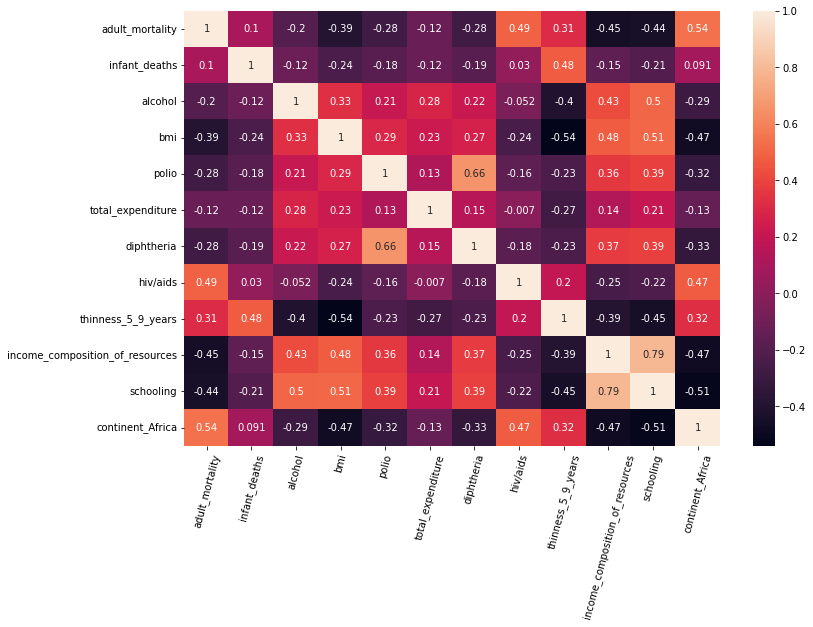

In [ ]:
plt.figure(figsize=(12,8))
g = sns.heatmap(X_train.drop(columns=columns_drop_gb).corr(), annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=75)

## Hyperparameter tunning

In [ ]:
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
params_gb = {'n_estimators':np.array(range(50,951,100)),"learning_rate": [0.01,0.025,0.05,0.075,0.1,0.25,0.5], 'subsample': [0.5,0.75,1.0], 'max_features': [0.5,'auto','sqrt','log2']}
grid_search = GridSearchCV(estimator= GradientBoostingRegressor(random_state=15), param_grid=params_gb, scoring='r2', cv=cv_sets, verbose= 3, n_jobs=-1)
grid_search.fit(X_train_gb_cleaned, y_train_gb_cleaned)
grid_search = grid_search.best_estimator_

Fitting 10 folds for each of 840 candidates, totalling 8400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
grid_search.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 950,
 'n_iter_no_change': None,
 'random_state': 15,
 'subsample': 0.75,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Final training model and testing

In [ ]:
Life_GB = GradientBoostingRegressor(learning_rate=0.1, n_estimators=950, random_state = 15, max_features='auto', subsample = 0.75)
X_train_gb_cleanedd = X_train_gb_cleaned.drop(columns = drop_gb)
Life_GB.fit(X_train_gb_cleanedd, y_train_gb_cleaned)

print("Train score:")
pred = Life_GB.predict(X_train_gb_cleanedd)
score(y_test= y_train_gb_cleaned, y_pred=pred, score_show=True)
print('<-------------------------------------------------------------------------------------------------->')
print("Test score:")
X_testtt = X_test.drop(columns=columns_drop_gb)
pred = Life_GB.predict(X_testtt)
score(y_test=y_test, y_pred=pred, score_show=True)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score:
r2 score: 0.9965814507949677
rmse: 0.3056903618401837
mae: 0.40820343629016387
<-------------------------------------------------------------------------------------------------->
Test score:
r2 score: 0.9562082669338026
rmse: 4.089730048497993
mae: 1.3117002029596643
